## Kaggle PlayGround Competition - Feb 2021

### Reading the data 

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df_train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,A,B,A,A,B,D,A,E,C,...,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
1,2,B,A,A,A,B,B,A,E,A,...,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
2,3,A,A,A,C,B,D,A,B,C,...,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
3,4,A,A,A,C,B,D,A,E,G,...,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
4,6,A,B,A,A,B,B,A,E,C,...,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974


In [4]:
df_train.shape

(300000, 26)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 26 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cat0    300000 non-null  object 
 2   cat1    300000 non-null  object 
 3   cat2    300000 non-null  object 
 4   cat3    300000 non-null  object 
 5   cat4    300000 non-null  object 
 6   cat5    300000 non-null  object 
 7   cat6    300000 non-null  object 
 8   cat7    300000 non-null  object 
 9   cat8    300000 non-null  object 
 10  cat9    300000 non-null  object 
 11  cont0   300000 non-null  float64
 12  cont1   300000 non-null  float64
 13  cont2   300000 non-null  float64
 14  cont3   300000 non-null  float64
 15  cont4   300000 non-null  float64
 16  cont5   300000 non-null  float64
 17  cont6   300000 non-null  float64
 18  cont7   300000 non-null  float64
 19  cont8   300000 non-null  float64
 20  cont9   300000 non-null  float64
 21  cont10  30

In [6]:
df_train.describe()

,id,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,250018.576947,0.524634,0.506649,0.444115,0.446214,0.455471,0.508337,0.478345,0.455904,0.459321,0.526899,0.504943,0.529938,0.524549,0.503349,7.456260
std,144450.150010,0.204875,0.235269,0.200089,0.238669,0.200695,0.231612,0.192432,0.204493,0.220642,0.204025,0.201549,0.230860,0.220892,0.225218,0.887295
min,1.000000,-0.093505,-0.055105,-0.060274,0.134760,0.189216,-0.087247,0.043953,0.208703,0.004041,0.073040,0.059644,0.064161,-0.005600,0.158121,0.000000
25%,124772.500000,0.370451,0.352307,0.314121,0.214572,0.279853,0.338747,0.339896,0.278041,0.308655,0.361957,0.338898,0.316662,0.332143,0.291289,6.798341
50%,250002.500000,0.492208,0.615156,0.457271,0.377823,0.411351,0.441384,0.410090,0.360736,0.425801,0.488867,0.519855,0.558827,0.407365,0.433909,7.496503
75%,375226.500000,0.654793,0.688150,0.554835,0.719758,0.621808,0.709515,0.604246,0.639388,0.541525,0.752765,0.672809,0.720381,0.732431,0.730870,8.161166
max,499999.000000,1.052666,0.851746,1.017689,1.006469,0.994050,1.044433,1.093312,1.036541,1.014156,0.972091,1.029773,1.038049,0.961370,0.873579,10.309208


### Removing Target from training dataset and

In [7]:
X = df_train.drop("target", axis = 1)
y = df_train["target"]

In [8]:
X.shape, y.shape

((300000, 25), (300000,))

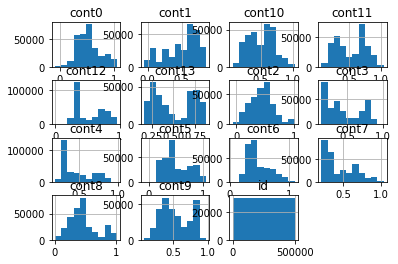

In [9]:
X.hist();

In [10]:
df_train.corr()

,id,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
id,1.000000,0.000221,0.002367,-0.000353,-0.000530,0.001846,-0.000544,0.001081,0.000381,-0.000858,-0.002219,-0.002606,-0.001952,-0.000695,-0.002619,0.000637
cont0,0.000221,1.000000,-0.122435,-0.268714,0.254450,-0.110564,0.575422,0.302765,0.301008,0.579133,0.524315,0.394608,0.425925,0.474031,0.040063,-0.039217
cont1,0.002367,-0.122435,1.000000,0.176182,-0.153708,-0.036118,-0.063597,0.097680,-0.092379,-0.105580,-0.036263,0.071484,0.059537,-0.080865,-0.033291,0.036767
cont2,-0.000353,-0.268714,0.176182,1.000000,-0.215764,0.048190,-0.292382,-0.050777,-0.214429,-0.276897,-0.228413,-0.071842,-0.106832,-0.329786,-0.054395,0.001806
cont3,-0.000530,0.254450,-0.153708,-0.215764,1.000000,-0.047835,0.252501,0.059500,0.214426,0.264950,0.219416,0.099317,0.131906,0.253377,0.042723,-0.005414
cont4,0.001846,-0.110564,-0.036118,0.048190,-0.047835,1.000000,-0.166930,-0.176369,-0.106053,-0.138045,-0.152713,-0.187616,-0.201191,-0.128014,-0.012573,-0.015908
cont5,-0.000544,0.575422,-0.063597,-0.292382,0.252501,-0.166930,1.000000,0.342678,0.341662,0.605475,0.615836,0.482362,0.509621,0.631926,0.030380,-0.025329
cont6,0.001081,0.302765,0.097680,-0.050777,0.059500,-0.176369,0.342678,1.000000,0.152232,0.307686,0.382399,0.456519,0.486724,0.246399,0.037930,0.015015
cont7,0.000381,0.301008,-0.092379,-0.214429,0.214426,-0.106053,0.341662,0.152232,1.000000,0.335029,0.285075,0.200825,0.228697,0.338485,0.050914,0.023479
cont8,-0.000858,0.579133,-0.105580,-0.276897,0.264950,-0.138045,0.605475,0.307686,0.335029,1.000000,0.558957,0.412967,0.458460,0.529932,0.046559,0.019246


In [11]:
# Checking null values if any
df_train.isnull().sum()

id        0
cat0      0
cat1      0
cat2      0
cat3      0
cat4      0
cat5      0
cat6      0
cat7      0
cat8      0
cat9      0
cont0     0
cont1     0
cont2     0
cont3     0
cont4     0
cont5     0
cont6     0
cont7     0
cont8     0
cont9     0
cont10    0
cont11    0
cont12    0
cont13    0
target    0
dtype: int64

In [12]:
X.dtypes

id          int64
cat0       object
cat1       object
cat2       object
cat3       object
cat4       object
cat5       object
cat6       object
cat7       object
cat8       object
cat9       object
cont0     float64
cont1     float64
cont2     float64
cont3     float64
cont4     float64
cont5     float64
cont6     float64
cont7     float64
cont8     float64
cont9     float64
cont10    float64
cont11    float64
cont12    float64
cont13    float64
dtype: object

### Seperating categorical features from dataframe for an input to our catboost model

In [13]:
categorical_features_indices = np.where(X.dtypes != np.float)[0]

In [14]:
categorical_features_indices

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor

In [16]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size = 0.6, random_state = 12)

In [17]:
X.shape, y.shape

((300000, 25), (300000,))

In [18]:
X_train.shape, y_train.shape

((120000, 25), (120000,))

In [37]:
model=CatBoostRegressor(iterations=1500, depth=5, learning_rate=0.1, loss_function='RMSE')
model.fit(X, y,cat_features=categorical_features_indices, verbose = 100)

0:	learn: 0.8844147	total: 489ms	remaining: 12m 12s
100:	learn: 0.8505455	total: 29.5s	remaining: 6m 48s
200:	learn: 0.8448995	total: 59.3s	remaining: 6m 22s
300:	learn: 0.8420026	total: 1m 27s	remaining: 5m 47s
400:	learn: 0.8400348	total: 1m 55s	remaining: 5m 15s
500:	learn: 0.8383879	total: 2m 22s	remaining: 4m 43s
600:	learn: 0.8370088	total: 2m 50s	remaining: 4m 14s
700:	learn: 0.8358291	total: 3m 17s	remaining: 3m 45s
800:	learn: 0.8346043	total: 3m 45s	remaining: 3m 16s
900:	learn: 0.8334739	total: 4m 12s	remaining: 2m 47s
1000:	learn: 0.8325166	total: 4m 39s	remaining: 2m 19s
1100:	learn: 0.8314804	total: 5m 7s	remaining: 1m 51s
1200:	learn: 0.8304271	total: 5m 35s	remaining: 1m 23s
1300:	learn: 0.8294134	total: 6m 2s	remaining: 55.5s
1400:	learn: 0.8284997	total: 6m 30s	remaining: 27.6s
1499:	learn: 0.8276363	total: 6m 57s	remaining: 0us


In [ ]:
model=CatBoostRegressor(iterations=1000, depth=4, learning_rate=0.1, loss_function='RMSE')
model.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_holdout, y_holdout),verbose = 100)

In [36]:
model=CatBoostRegressor(iterations=1500, depth=5, learning_rate=0.1, loss_function='RMSE')
model.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_holdout, y_holdout),verbose = 100)

0:	learn: 0.8840429	test: 0.8849589	best: 0.8849589 (0)	total: 372ms	remaining: 9m 18s
100:	learn: 0.8502491	test: 0.8522209	best: 0.8522209 (100)	total: 23.2s	remaining: 5m 20s
200:	learn: 0.8433060	test: 0.8478083	best: 0.8478083 (200)	total: 45.5s	remaining: 4m 53s
300:	learn: 0.8390532	test: 0.8463041	best: 0.8463041 (300)	total: 1m 7s	remaining: 4m 27s
400:	learn: 0.8357374	test: 0.8454845	best: 0.8454845 (400)	total: 1m 29s	remaining: 4m 4s
500:	learn: 0.8329084	test: 0.8449395	best: 0.8449395 (500)	total: 1m 50s	remaining: 3m 41s
600:	learn: 0.8304113	test: 0.8447499	best: 0.8447461 (595)	total: 2m 13s	remaining: 3m 19s
700:	learn: 0.8280452	test: 0.8445938	best: 0.8445844 (697)	total: 2m 35s	remaining: 2m 56s
800:	learn: 0.8258463	test: 0.8444880	best: 0.8444728 (783)	total: 2m 56s	remaining: 2m 34s
900:	learn: 0.8237702	test: 0.8444464	best: 0.8444402 (859)	total: 3m 18s	remaining: 2m 11s
1000:	learn: 0.8217620	test: 0.8444539	best: 0.8444288 (938)	total: 3m 40s	remaining: 1m 

### Now predicting values and ready for first submission

In [38]:
predictions_catboost = model.predict(df_test)

In [39]:
submission = pd.DataFrame({'id':df_test['id'],'target':predictions_catboost})

In [40]:
submission.head(2)

,id,target
0,0,7.694771
1,5,7.746094


In [41]:
submission.to_csv("sample_submission.csv", index=False) 

In [ ]:
## Kaggle Score: 0.84567, Current Rank: 360 (bestTest = 0.8450377535)
## Kaggle Score: 0.84541, Current Rank: 356 (bestTest = 0.8446697008)
## Kaggle Score: 0.84425, Current Rank: 293 (bestTest = 0.8397854365) later changed to 447
## Kaggle Score: 0.84358, Current Rank: 391 (bestTest = 0.8325187)

### Now explore Grid Search CV


In [91]:
cat_model = CatBoostRegressor(cat_features=categorical_features_indices)
parameters = {'depth': [3,6], 'learning_rate' : [0.1], 'iterations': [900,1000]}
cat_grid = GridSearchCV(estimator=cat_model, param_grid = parameters, cv = 2, n_jobs=-1)
   

In [92]:
cat_grid.fit(X_train, y_train) 

0:	learn: 0.8845887	total: 70.8ms	remaining: 1m 10s
1:	learn: 0.8826895	total: 135ms	remaining: 1m 7s
2:	learn: 0.8811097	total: 162ms	remaining: 54s
3:	learn: 0.8799453	total: 206ms	remaining: 51.2s
4:	learn: 0.8787759	total: 231ms	remaining: 46s
5:	learn: 0.8778396	total: 298ms	remaining: 49.4s
6:	learn: 0.8767215	total: 346ms	remaining: 49.1s
7:	learn: 0.8760065	total: 401ms	remaining: 49.7s
8:	learn: 0.8752103	total: 461ms	remaining: 50.8s
9:	learn: 0.8745094	total: 503ms	remaining: 49.7s
10:	learn: 0.8737927	total: 584ms	remaining: 52.5s
11:	learn: 0.8731991	total: 644ms	remaining: 53s
12:	learn: 0.8725071	total: 697ms	remaining: 52.9s
13:	learn: 0.8718833	total: 776ms	remaining: 54.7s
14:	learn: 0.8712523	total: 835ms	remaining: 54.9s
15:	learn: 0.8707515	total: 891ms	remaining: 54.8s
16:	learn: 0.8701003	total: 951ms	remaining: 55s
17:	learn: 0.8695692	total: 1.02s	remaining: 55.5s
18:	learn: 0.8691751	total: 1.08s	remaining: 55.9s
19:	learn: 0.8687176	total: 1.14s	remaining: 55

163:	learn: 0.8504795	total: 9.88s	remaining: 50.3s
164:	learn: 0.8504270	total: 9.95s	remaining: 50.3s
165:	learn: 0.8503624	total: 10s	remaining: 50.2s
166:	learn: 0.8503160	total: 10.1s	remaining: 50.1s
167:	learn: 0.8502460	total: 10.1s	remaining: 50.1s
168:	learn: 0.8502094	total: 10.2s	remaining: 50.1s
169:	learn: 0.8501535	total: 10.2s	remaining: 50s
170:	learn: 0.8501067	total: 10.3s	remaining: 49.9s
171:	learn: 0.8500688	total: 10.4s	remaining: 49.8s
172:	learn: 0.8499943	total: 10.4s	remaining: 49.8s
173:	learn: 0.8499593	total: 10.5s	remaining: 49.7s
174:	learn: 0.8499085	total: 10.5s	remaining: 49.6s
175:	learn: 0.8498636	total: 10.6s	remaining: 49.5s
176:	learn: 0.8498284	total: 10.6s	remaining: 49.4s
177:	learn: 0.8497707	total: 10.7s	remaining: 49.3s
178:	learn: 0.8497370	total: 10.7s	remaining: 49.3s
179:	learn: 0.8496973	total: 10.8s	remaining: 49.2s
180:	learn: 0.8496569	total: 10.9s	remaining: 49.1s
181:	learn: 0.8496145	total: 10.9s	remaining: 49s
182:	learn: 0.8495

324:	learn: 0.8450370	total: 19.6s	remaining: 40.7s
325:	learn: 0.8450228	total: 19.6s	remaining: 40.6s
326:	learn: 0.8450003	total: 19.7s	remaining: 40.5s
327:	learn: 0.8449717	total: 19.7s	remaining: 40.5s
328:	learn: 0.8449630	total: 19.8s	remaining: 40.4s
329:	learn: 0.8449408	total: 19.9s	remaining: 40.4s
330:	learn: 0.8449237	total: 19.9s	remaining: 40.3s
331:	learn: 0.8449184	total: 20s	remaining: 40.2s
332:	learn: 0.8448898	total: 20s	remaining: 40.1s
333:	learn: 0.8448739	total: 20.1s	remaining: 40.1s
334:	learn: 0.8448569	total: 20.1s	remaining: 40s
335:	learn: 0.8448411	total: 20.2s	remaining: 39.9s
336:	learn: 0.8448202	total: 20.3s	remaining: 39.9s
337:	learn: 0.8448002	total: 20.3s	remaining: 39.8s
338:	learn: 0.8447715	total: 20.4s	remaining: 39.8s
339:	learn: 0.8447351	total: 20.4s	remaining: 39.7s
340:	learn: 0.8447189	total: 20.5s	remaining: 39.6s
341:	learn: 0.8447002	total: 20.6s	remaining: 39.6s
342:	learn: 0.8446705	total: 20.6s	remaining: 39.5s
343:	learn: 0.8446

483:	learn: 0.8421630	total: 28.8s	remaining: 30.7s
484:	learn: 0.8421577	total: 28.8s	remaining: 30.6s
485:	learn: 0.8421439	total: 28.9s	remaining: 30.5s
486:	learn: 0.8421275	total: 28.9s	remaining: 30.5s
487:	learn: 0.8421090	total: 29s	remaining: 30.4s
488:	learn: 0.8420834	total: 29s	remaining: 30.4s
489:	learn: 0.8420813	total: 29.1s	remaining: 30.3s
490:	learn: 0.8420644	total: 29.1s	remaining: 30.2s
491:	learn: 0.8420515	total: 29.2s	remaining: 30.2s
492:	learn: 0.8420347	total: 29.3s	remaining: 30.1s
493:	learn: 0.8420146	total: 29.3s	remaining: 30s
494:	learn: 0.8420094	total: 29.4s	remaining: 30s
495:	learn: 0.8419996	total: 29.4s	remaining: 29.9s
496:	learn: 0.8419876	total: 29.5s	remaining: 29.9s
497:	learn: 0.8419794	total: 29.6s	remaining: 29.8s
498:	learn: 0.8419551	total: 29.6s	remaining: 29.7s
499:	learn: 0.8419344	total: 29.7s	remaining: 29.7s
500:	learn: 0.8419342	total: 29.7s	remaining: 29.6s
501:	learn: 0.8419270	total: 29.8s	remaining: 29.6s
502:	learn: 0.841917

645:	learn: 0.8401928	total: 38.7s	remaining: 21.2s
646:	learn: 0.8401834	total: 38.8s	remaining: 21.2s
647:	learn: 0.8401829	total: 38.8s	remaining: 21.1s
648:	learn: 0.8401807	total: 38.9s	remaining: 21s
649:	learn: 0.8401628	total: 39s	remaining: 21s
650:	learn: 0.8401399	total: 39s	remaining: 20.9s
651:	learn: 0.8401379	total: 39.1s	remaining: 20.8s
652:	learn: 0.8401212	total: 39.1s	remaining: 20.8s
653:	learn: 0.8401088	total: 39.2s	remaining: 20.7s
654:	learn: 0.8401074	total: 39.2s	remaining: 20.7s
655:	learn: 0.8400828	total: 39.3s	remaining: 20.6s
656:	learn: 0.8400661	total: 39.3s	remaining: 20.5s
657:	learn: 0.8400545	total: 39.4s	remaining: 20.5s
658:	learn: 0.8400538	total: 39.4s	remaining: 20.4s
659:	learn: 0.8400421	total: 39.5s	remaining: 20.3s
660:	learn: 0.8400264	total: 39.5s	remaining: 20.3s
661:	learn: 0.8400219	total: 39.6s	remaining: 20.2s
662:	learn: 0.8399993	total: 39.7s	remaining: 20.2s
663:	learn: 0.8399979	total: 39.7s	remaining: 20.1s
664:	learn: 0.839985

807:	learn: 0.8384407	total: 48.6s	remaining: 11.5s
808:	learn: 0.8384338	total: 48.7s	remaining: 11.5s
809:	learn: 0.8384276	total: 48.7s	remaining: 11.4s
810:	learn: 0.8384147	total: 48.8s	remaining: 11.4s
811:	learn: 0.8384115	total: 48.8s	remaining: 11.3s
812:	learn: 0.8383920	total: 49s	remaining: 11.3s
813:	learn: 0.8383873	total: 49s	remaining: 11.2s
814:	learn: 0.8383824	total: 49.1s	remaining: 11.1s
815:	learn: 0.8383797	total: 49.1s	remaining: 11.1s
816:	learn: 0.8383646	total: 49.2s	remaining: 11s
817:	learn: 0.8383591	total: 49.3s	remaining: 11s
818:	learn: 0.8383568	total: 49.4s	remaining: 10.9s
819:	learn: 0.8383520	total: 49.4s	remaining: 10.8s
820:	learn: 0.8383464	total: 49.5s	remaining: 10.8s
821:	learn: 0.8383405	total: 49.5s	remaining: 10.7s
822:	learn: 0.8383318	total: 49.6s	remaining: 10.7s
823:	learn: 0.8383289	total: 49.6s	remaining: 10.6s
824:	learn: 0.8383149	total: 49.7s	remaining: 10.5s
825:	learn: 0.8383087	total: 49.8s	remaining: 10.5s
826:	learn: 0.838306

968:	learn: 0.8370179	total: 58.2s	remaining: 1.86s
969:	learn: 0.8370027	total: 58.2s	remaining: 1.8s
970:	learn: 0.8370015	total: 58.3s	remaining: 1.74s
971:	learn: 0.8369984	total: 58.3s	remaining: 1.68s
972:	learn: 0.8369849	total: 58.4s	remaining: 1.62s
973:	learn: 0.8369792	total: 58.4s	remaining: 1.56s
974:	learn: 0.8369600	total: 58.5s	remaining: 1.5s
975:	learn: 0.8369533	total: 58.6s	remaining: 1.44s
976:	learn: 0.8369395	total: 58.6s	remaining: 1.38s
977:	learn: 0.8369205	total: 58.7s	remaining: 1.32s
978:	learn: 0.8369046	total: 58.7s	remaining: 1.26s
979:	learn: 0.8368969	total: 58.8s	remaining: 1.2s
980:	learn: 0.8368965	total: 58.9s	remaining: 1.14s
981:	learn: 0.8368831	total: 58.9s	remaining: 1.08s
982:	learn: 0.8368820	total: 59s	remaining: 1.02s
983:	learn: 0.8368699	total: 59s	remaining: 960ms
984:	learn: 0.8368676	total: 59.1s	remaining: 900ms
985:	learn: 0.8368663	total: 59.2s	remaining: 840ms
986:	learn: 0.8368609	total: 59.2s	remaining: 780ms
987:	learn: 0.83684

GridSearchCV(cv=2, error_score=nan,
             estimator=<catboost.core.CatBoostRegressor object at 0x12f560f10>,
             iid='deprecated', n_jobs=-1,
             param_grid={'depth': [3, 6], 'iterations': [900, 1000],
                         'learning_rate': [0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [93]:
cat_grid.best_params_

{'depth': 3, 'iterations': 1000, 'learning_rate': 0.1}

In [94]:
cat_grid.best_score_

0.08632072087508247

In [87]:
grid_cat_predict=cat_grid.predict(df_test)

In [88]:
submission = pd.DataFrame({'id':df_test['id'],'target':grid_cat_predict})

In [89]:
submission.head(2)

,id,target
0,0,7.583360
1,5,7.800671


In [90]:
submission.to_csv("sample_submission.csv", index=False) 